In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pickle
import clean_data

model_cols = ['BSTAR', 'INCLINATION', 'RA_OF_ASC_NODE', 'ECCENTRICITY', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY',
              'MEAN_MOTION', 'epoch_jd', 'epoch_fr',
              #'MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT', 
             ]

def clean_df(df):
    df = clean_data.add_epoch_data(df)
    df = clean_data.normalize_all_columns(df)
    return df

def clean_all(train_df, test_df):
    train_df = clean_df(train_df)
    test_df = clean_df(test_df)
    return train_df,test_df

def load_all():
    train_df = pd.read_pickle('data/train.pkl' )
    #test_df = pd.read_pickle('data/test.pkl' )
    return train_df #, test_df

train_df = load_all()
#train_df,test_df = clean_all(train_df, test_df)

In [3]:
train_df = train_df[train_df['NORAD_CAT_ID'] == 14631].reset_index(drop=True)
train_df = clean_df(train_df)
train_model_df = train_df[model_cols]
idx_map = clean_data.create_index_map(train_df)

100%|██████████| 1/1 [00:00<00:00, 21.05it/s]


In [4]:
split = 0.8
train_idx_map = idx_map[:int(len(idx_map)*split)]
test_idx_map = idx_map[int(len(idx_map)*split):]

In [6]:
import train

model = train.create_model(model_cols=model_cols,
                           layer1=300, relu1=True, #drop1=0.5,
                           layer2=300, relu2=True, #drop2=0.5,
                           layer3=200, relu3=True, #drop3=0.5,
                          )
model

NNModelEx(
  (net): Sequential(
    (0): Linear(in_features=11, out_features=300, bias=True)
    (1): ReLU()
    (2): Linear(in_features=300, out_features=300, bias=True)
    (3): ReLU()
    (4): Linear(in_features=300, out_features=200, bias=True)
    (5): ReLU()
    (6): Linear(in_features=200, out_features=7, bias=True)
    (7): ReLU()
  )
)

In [7]:
%%time
device='cpu'
trained_model, loss_output = train.train_model(train_model_df, train_idx_map, batchSize=2000,
                                               print_itr=8, numEpochs=500, model_cols=model_cols,
                                               learningRate=0.00001, device=device, num_workers=10,
                                               loss='L2', model=model)

>>> Loading dataset
>>> Beginning training!
Epoch [1/500], Batch [8/8], Loss: 0.44924381375312805, Time: 2s
Epoch [2/500], Batch [8/8], Loss: 0.45883363485336304, Time: 2s
Epoch [3/500], Batch [8/8], Loss: 0.44349560141563416, Time: 2s
Epoch [4/500], Batch [8/8], Loss: 0.43257537484169006, Time: 3s
Epoch [5/500], Batch [8/8], Loss: 0.424635112285614, Time: 2s
Epoch [6/500], Batch [8/8], Loss: 0.41281047463417053, Time: 2s
Epoch [7/500], Batch [8/8], Loss: 0.40639063715934753, Time: 3s
Epoch [8/500], Batch [8/8], Loss: 0.39052334427833557, Time: 3s
Epoch [9/500], Batch [8/8], Loss: 0.3837663531303406, Time: 2s
Epoch [10/500], Batch [8/8], Loss: 0.37476491928100586, Time: 3s
Epoch [11/500], Batch [8/8], Loss: 0.3639633059501648, Time: 3s
Epoch [12/500], Batch [8/8], Loss: 0.35396504402160645, Time: 3s
Epoch [13/500], Batch [8/8], Loss: 0.3432087004184723, Time: 2s
Epoch [14/500], Batch [8/8], Loss: 0.3446402847766876, Time: 2s
Epoch [15/500], Batch [8/8], Loss: 0.3236660361289978, Time: 

Epoch [127/500], Batch [8/8], Loss: 0.07065501064062119, Time: 3s
Epoch [128/500], Batch [8/8], Loss: 0.0856100469827652, Time: 3s
Epoch [129/500], Batch [8/8], Loss: 0.07229354977607727, Time: 3s
Epoch [130/500], Batch [8/8], Loss: 0.07083194702863693, Time: 3s
Epoch [131/500], Batch [8/8], Loss: 0.07003071159124374, Time: 3s
Epoch [132/500], Batch [8/8], Loss: 0.06964144110679626, Time: 3s
Epoch [133/500], Batch [8/8], Loss: 0.08461931347846985, Time: 3s
Epoch [134/500], Batch [8/8], Loss: 0.0700390413403511, Time: 3s
Epoch [135/500], Batch [8/8], Loss: 0.07076244056224823, Time: 3s
Epoch [136/500], Batch [8/8], Loss: 0.08580444008111954, Time: 3s
Epoch [137/500], Batch [8/8], Loss: 0.07076889276504517, Time: 3s
Epoch [138/500], Batch [8/8], Loss: 0.06920912116765976, Time: 3s
Epoch [139/500], Batch [8/8], Loss: 0.07188637554645538, Time: 3s
Epoch [140/500], Batch [8/8], Loss: 0.0708557739853859, Time: 3s
Epoch [141/500], Batch [8/8], Loss: 0.08401148021221161, Time: 3s
Epoch [142/50

Epoch [252/500], Batch [8/8], Loss: 0.06822945922613144, Time: 3s
Epoch [253/500], Batch [8/8], Loss: 0.0678425058722496, Time: 3s
Epoch [254/500], Batch [8/8], Loss: 0.0702311173081398, Time: 3s
Epoch [255/500], Batch [8/8], Loss: 0.06763455271720886, Time: 3s
Epoch [256/500], Batch [8/8], Loss: 0.06772181391716003, Time: 3s
Epoch [257/500], Batch [8/8], Loss: 0.06951819360256195, Time: 3s
Epoch [258/500], Batch [8/8], Loss: 0.06740855425596237, Time: 3s
Epoch [259/500], Batch [8/8], Loss: 0.06897789984941483, Time: 3s
Epoch [260/500], Batch [8/8], Loss: 0.06841778755187988, Time: 3s
Epoch [261/500], Batch [8/8], Loss: 0.06834544241428375, Time: 3s
Epoch [262/500], Batch [8/8], Loss: 0.06825301796197891, Time: 3s
Epoch [263/500], Batch [8/8], Loss: 0.06795068085193634, Time: 3s
Epoch [264/500], Batch [8/8], Loss: 0.06989441066980362, Time: 3s
Epoch [265/500], Batch [8/8], Loss: 0.06794141978025436, Time: 3s
Epoch [266/500], Batch [8/8], Loss: 0.06839880347251892, Time: 3s
Epoch [267/5

Epoch [377/500], Batch [8/8], Loss: 0.06725715100765228, Time: 3s
Epoch [378/500], Batch [8/8], Loss: 0.06747891008853912, Time: 3s
Epoch [379/500], Batch [8/8], Loss: 0.06878826767206192, Time: 3s
Epoch [380/500], Batch [8/8], Loss: 0.06824284791946411, Time: 3s
Epoch [381/500], Batch [8/8], Loss: 0.0682704970240593, Time: 3s
Epoch [382/500], Batch [8/8], Loss: 0.06733956933021545, Time: 3s
Epoch [383/500], Batch [8/8], Loss: 0.06729335337877274, Time: 3s
Epoch [384/500], Batch [8/8], Loss: 0.06829323619604111, Time: 3s
Epoch [385/500], Batch [8/8], Loss: 0.06845666468143463, Time: 3s
Epoch [386/500], Batch [8/8], Loss: 0.06885914504528046, Time: 3s
Epoch [387/500], Batch [8/8], Loss: 0.06752598285675049, Time: 3s
Epoch [388/500], Batch [8/8], Loss: 0.06786079704761505, Time: 3s
Epoch [389/500], Batch [8/8], Loss: 0.06957557052373886, Time: 3s
Epoch [390/500], Batch [8/8], Loss: 0.06797117739915848, Time: 3s
Epoch [391/500], Batch [8/8], Loss: 0.08261200040578842, Time: 3s
Epoch [392/

In [12]:
X_train,y_train = clean_data.build_xy(train_model_df,train_idx_map)  # create input/label pair
X_test,y_test = clean_data.build_xy(train_model_df,test_idx_map)  # create input/label pair
y_train_pred = train.predict(trained_model, X_test, device=device) # get predictions for each train
y_test_pred = train.predict(trained_model, X_test, device=device) # get predictions for each test
y_train_pred_df = pd.DataFrame(y_train_pred, columns=train_model_df.columns[:-2])  # put results into a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred, columns=train_model_df.columns[:-2])  # put results into a dataframe

    Test set MAE (L1) loss: 0.1440299256315309
    Test set MSE (L2) loss: 0.07443746599568021


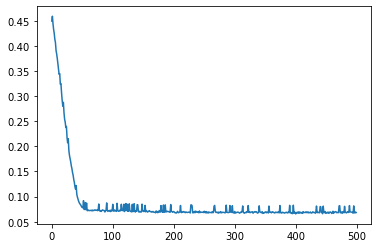

In [13]:
print(f'    Test set MAE (L1) loss: {mean_absolute_error(y_test, y_test_pred_df)}')
print(f'    Test set MSE (L2) loss: {mean_squared_error(y_test, y_test_pred_df)}')

plt.plot([float(l['loss']) for l in loss_output])

In [17]:
print("Train - Ground Truth:")
display(clean_data.normalize_all_columns(y_train.head().copy(), reverse=True))  # see ground truths
print("Train - Prediction:")
display(clean_data.normalize_all_columns(y_train_pred_df.head().copy(), reverse=True))  # See predictions

Train - Ground Truth:


,BSTAR,INCLINATION,RA_OF_ASC_NODE,ECCENTRICITY,ARG_OF_PERICENTER,MEAN_ANOMALY,MEAN_MOTION
0,0.000172,97.5891,89.2985,0.002764,129.1489,231.2266,14.932819
1,0.000089,97.8168,89.6696,0.000834,209.9726,150.1036,15.286642
2,0.000024,97.6766,51.2647,0.001438,77.8957,282.3697,15.130646
3,0.000022,97.6026,274.3799,0.002504,210.9792,148.9966,14.935562
4,0.000080,97.6403,357.2280,0.002655,126.3307,234.0389,14.940357


Train - Prediction:


,BSTAR,INCLINATION,RA_OF_ASC_NODE,ECCENTRICITY,ARG_OF_PERICENTER,MEAN_ANOMALY,MEAN_MOTION
0,0.0,96.209366,178.526703,0.001414,0.0,179.116516,15.081505
1,0.0,97.814819,185.073669,0.000837,0.0,188.625916,15.318454
2,0.0,97.424614,177.268341,0.002361,0.0,182.779800,14.940508
3,0.0,96.506554,177.268219,0.002459,0.0,183.883728,14.859314
4,0.0,98.545624,186.881546,0.001180,0.0,187.392365,15.214928


In [18]:
print("Test - Ground Truth:")
display(clean_data.normalize_all_columns(y_test.head().copy(), reverse=True))  # see ground truths
print("Test - Prediction:")
display(clean_data.normalize_all_columns(y_pred_df.head().copy(), reverse=True))  # See predictions

Test - Ground Truth:


,BSTAR,INCLINATION,RA_OF_ASC_NODE,ECCENTRICITY,ARG_OF_PERICENTER,MEAN_ANOMALY,MEAN_MOTION
0,0.000082,97.8050,48.8779,0.001378,135.9387,224.2943,15.116934
1,0.000018,97.7597,89.4993,0.000762,194.2864,165.8162,15.325618
2,-0.000011,97.7066,220.8896,0.002423,299.0911,60.7878,14.943407
3,0.000513,97.6230,292.2434,0.003217,93.4454,267.0406,14.848775
4,0.000122,97.6968,182.6337,0.001036,310.9958,195.4624,15.183424


Test - Prediction:


,BSTAR,INCLINATION,RA_OF_ASC_NODE,ECCENTRICITY,ARG_OF_PERICENTER,MEAN_ANOMALY,MEAN_MOTION
0,0.0,96.209366,178.526703,0.001414,0.0,179.116516,15.081505
1,0.0,97.814819,185.073669,0.000837,0.0,188.625916,15.318454
2,0.0,97.424614,177.268341,0.002361,0.0,182.779800,14.940508
3,0.0,96.506554,177.268219,0.002459,0.0,183.883728,14.859314
4,0.0,98.545624,186.881546,0.001180,0.0,187.392365,15.214928
